# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Aryadharma Wibowo
- **Email:** aryadharmaw@gmail.com / m002b4ky0683@bangkit.academy
- **ID Dicoding:** aryadhammaw

## Menentukan Pertanyaan Bisnis

*  Which times of day experience the highest bike users ("cnt") across different seasons?

*   How does weather status ("weathersit") influence the number of bike rentals?

## Import Semua Packages/Library yang Digunakan

In [ ]:
pip install calmap

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import calmap

## Data Wrangling

### Gathering Data

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/day.csv'
dfDay = pd.read_csv(file_path)

dfDay.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/hour.csv'
dfHour = pd.read_csv(file_path)

dfHour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
print(dfDay.shape)
print(dfHour.shape)

(731, 16)
(17379, 17)


**Insight:**
- On dfDay we have 731 daily records within 16 feature
- On dfHour we have 17,379 hourly records within 17 feature (this additional feature contain specific time [in hour] information)

### Assessing Data

In [ ]:
dfDay.info()
dfHour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [ ]:
dfDay.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
dfHour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
dfDay.duplicated().sum()

0

In [ ]:
dfHour.duplicated().sum()

0

**Insight:**

1. From running code above, we will see that there is no missing value in each of
data provided.

*It can be seen from the fact that total entries = Non-Null Count
or can be seen from
```
dfDay.isna().sum()
dfHour.isna.().sum()
```

2. the type of column dteday still in object, therefore we need to change them into datetime64 type

3. from running :


```
dfDay.duplicated().sum()
dfHour.duplicated().sum()
```

there are no duplicated data


### Cleaning Data

In [ ]:
dfDay['dteday'] = pd.to_datetime(dfDay['dteday'])
dfHour['dteday'] = pd.to_datetime(dfHour['dteday'])

In [ ]:
dfDay.info()
dfHour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**

- now we already have the column 'dteday' as a datetime64, therefore our data should be ready to be analyzed



## Exploratory Data Analysis (EDA)

### Explore ...

we might want to explore something that could answer these following questions:
*  Which times of day experience the highest bike rental demand across different seasons?

*   How does weather condition (e.g., clear vs. rainy days) influence the number of bike rentals?

For number 1, let's first divide the data by season

In [ ]:
dfHour_Spring = dfHour[dfHour['season'] == 2]
dfHour_Summer = dfHour[dfHour['season'] == 3]
dfHour_Fall = dfHour[dfHour['season'] == 4]
dfHour_Winter = dfHour[dfHour['season'] == 1]

we will defining peak hour as:

**an hour that is having demand('cnt') >= 'cnt' Q3 value**

note that Q3 value most likely different across the season

In [ ]:
dfHour_Spring_Q3 = dfHour_Spring['cnt'].quantile(0.75)
dfHour_Summer_Q3 = dfHour_Summer['cnt'].quantile(0.75)
dfHour_Fall_Q3 = dfHour_Fall['cnt'].quantile(0.75)
dfHour_Winter_Q3 = dfHour_Winter['cnt'].quantile(0.75)

In [ ]:
print(dfHour_Spring_Q3)
print(dfHour_Summer_Q3)
print(dfHour_Fall_Q3)
print(dfHour_Winter_Q3)

311.0
345.0
295.0
158.0


In [ ]:
Hdemand_Hourly_Spring = dfHour_Spring[dfHour_Spring['cnt'] >= dfHour_Spring_Q3]
Hdemand_Hourly_Summer = dfHour_Summer[dfHour_Summer['cnt'] >= dfHour_Summer_Q3]
Hdemand_Hourly_Fall = dfHour_Fall[dfHour_Fall['cnt'] >= dfHour_Fall_Q3]
Hdemand_Hourly_Winter = dfHour_Winter[dfHour_Winter['cnt'] >= dfHour_Winter_Q3]

In [ ]:
time_count_Spring = {}
time_count_Summer = {}
time_count_Fall = {}
time_count_Winter = {}
for i in range(24):
  time_count_Spring[f'time {i}'] = (Hdemand_Hourly_Spring['hr'] == i).sum()
  time_count_Summer[f'time {i}'] = (Hdemand_Hourly_Summer['hr'] == i).sum()
  time_count_Fall[f'time {i}'] = (Hdemand_Hourly_Fall['hr'] == i).sum()
  time_count_Winter[f'time {i}'] = (Hdemand_Hourly_Winter['hr'] == i).sum()

In [ ]:
# Sort the dictionary by keys in descending order
sorted_time_Spring = dict(sorted(time_count_Spring.items(), key=lambda item: item[1], reverse=True))
sorted_time_Summer = dict(sorted(time_count_Summer.items(), key=lambda item: item[1], reverse=True))
sorted_time_Fall = dict(sorted(time_count_Fall.items(), key=lambda item: item[1], reverse=True))
sorted_time_Winter = dict(sorted(time_count_Winter.items(), key=lambda item: item[1], reverse=True))

In [ ]:
print('Winter\n')
sorted_time_Winter

Winter



{'time 17': 126,
 'time 18': 109,
 'time 8': 106,
 'time 16': 86,
 'time 13': 78,
 'time 12': 76,
 'time 15': 74,
 'time 14': 69,
 'time 19': 68,
 'time 9': 65,
 'time 7': 53,
 'time 11': 50,
 'time 20': 49,
 'time 21': 26,
 'time 10': 23,
 'time 22': 7,
 'time 23': 1,
 'time 0': 0,
 'time 1': 0,
 'time 2': 0,
 'time 3': 0,
 'time 4': 0,
 'time 5': 0,
 'time 6': 0}

In [ ]:
print('Spring\n')
sorted_time_Spring

Spring



{'time 17': 147,
 'time 18': 144,
 'time 19': 117,
 'time 8': 111,
 'time 16': 106,
 'time 7': 62,
 'time 20': 61,
 'time 13': 60,
 'time 15': 60,
 'time 12': 58,
 'time 14': 55,
 'time 9': 44,
 'time 11': 43,
 'time 10': 26,
 'time 21': 11,
 'time 22': 2,
 'time 0': 0,
 'time 1': 0,
 'time 2': 0,
 'time 3': 0,
 'time 4': 0,
 'time 5': 0,
 'time 6': 0,
 'time 23': 0}

In [ ]:
print('Summer\n')
sorted_time_Summer

Summer



{'time 17': 162,
 'time 18': 156,
 'time 19': 130,
 'time 8': 125,
 'time 16': 104,
 'time 7': 66,
 'time 20': 64,
 'time 13': 56,
 'time 12': 55,
 'time 15': 55,
 'time 14': 47,
 'time 11': 37,
 'time 9': 29,
 'time 10': 25,
 'time 21': 14,
 'time 22': 1,
 'time 0': 0,
 'time 1': 0,
 'time 2': 0,
 'time 3': 0,
 'time 4': 0,
 'time 5': 0,
 'time 6': 0,
 'time 23': 0}

In [ ]:
print('Fall\n')
sorted_time_Fall

Fall



{'time 17': 139,
 'time 18': 129,
 'time 16': 113,
 'time 8': 110,
 'time 19': 87,
 'time 15': 74,
 'time 12': 69,
 'time 7': 68,
 'time 13': 68,
 'time 14': 57,
 'time 9': 54,
 'time 11': 38,
 'time 20': 28,
 'time 10': 21,
 'time 21': 7,
 'time 0': 0,
 'time 1': 0,
 'time 2': 0,
 'time 3': 0,
 'time 4': 0,
 'time 5': 0,
 'time 6': 0,
 'time 22': 0,
 'time 23': 0}

**Insight:**
- time 17 and 18 are consistently being top two in term of peak hour across different season

for question number 2, we might interested to look for the correlation between column 'cnt' and the weather indicator

note that:

'season' column is referring to what season currently occured in a certain day / hour

- season 1 = winter
- season 2 = spring
- season 3 = summer
- season 4 = fall

'weathersit' is a weather status across different seasons with:

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [ ]:
dfDay_Spring = dfDay[dfDay['season'] == 2]
dfDay_Summer = dfDay[dfDay['season'] == 3]
dfDay_Fall = dfDay[dfDay['season'] == 4]
dfDay_Winter = dfDay[dfDay['season'] == 1]

In [ ]:
print(dfDay_Spring['weathersit'].corr(np.log(dfDay_Spring['cnt'])))
print(dfDay_Summer['weathersit'].corr(np.log(dfDay_Summer['cnt'])))
print(dfDay_Fall['weathersit'].corr(np.log(dfDay_Fall['cnt'])))
print(dfDay_Winter['weathersit'].corr(np.log(dfDay_Winter['cnt'])))

-0.4955844228077957
-0.3636599660284133
-0.39305082512233425
-0.2701406458812549


In [ ]:
print(dfDay['weathersit'].corr(np.log(dfDay['cnt'])))

-0.3225384856972826


**Insight:**
- In the spring season, there is a moderate negative correlation between the weather status and the number of bike users. As the weather status ('weathersit') worsens, the number of bike users decreases.
- Meanwhile in other season, there is a low  negative correlation between the weather status and the number of bike users.
- For overall season, there is a low negative correlation between the weather status and the number of bike users.

Now, the question is:

is it statistically significant?

In [ ]:
# Perform ANOVA test across the weather conditions
f_stat, p_value = stats.f_oneway(dfDay[dfDay['weathersit'] == 1]['cnt'],
                                 dfDay[dfDay['weathersit'] == 2]['cnt'],
                                 dfDay[dfDay['weathersit'] == 3]['cnt'],
                                 dfDay[dfDay['weathersit'] == 4]['cnt'])

print('ANOVA F-statistic:', f_stat)
print('ANOVA p-value:', p_value)

ANOVA F-statistic: nan
ANOVA p-value: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


notice that we get nan output here, and it is written that one of the input has no value. let's find which parameter is missing the value

In [ ]:
print(dfDay[dfDay['weathersit'] == 1].shape)
print(dfDay[dfDay['weathersit'] == 2].shape)
print(dfDay[dfDay['weathersit'] == 3].shape)
print(dfDay[dfDay['weathersit'] == 4].shape)

(463, 16)
(247, 16)
(21, 16)
(0, 16)


Now, we know that :
```
dfDay[dfDay['weathersit'] == 4]['cnt']
```
is the parameter which is missing the value, therefore we should get rid of the parameter in the code. Rewrite the code, we get:


In [ ]:
# Perform ANOVA test across the weather conditions
f_stat, p_value = stats.f_oneway(dfDay[dfDay['weathersit'] == 1]['cnt'],
                                 dfDay[dfDay['weathersit'] == 2]['cnt'],
                                 dfDay[dfDay['weathersit'] == 3]['cnt'])

print('ANOVA F-statistic:', f_stat)
print('ANOVA p-value:', p_value)

ANOVA F-statistic: 40.06604492024684
ANOVA p-value: 3.106317270053755e-17


**Insight**:

Since the p-value is approximately $3.11 \times 10^{-17}$, the difference between the weather statuses ('weathersit') is statistically significant.

In conclusion, although the correlation is not very strong, the difference remains significant.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

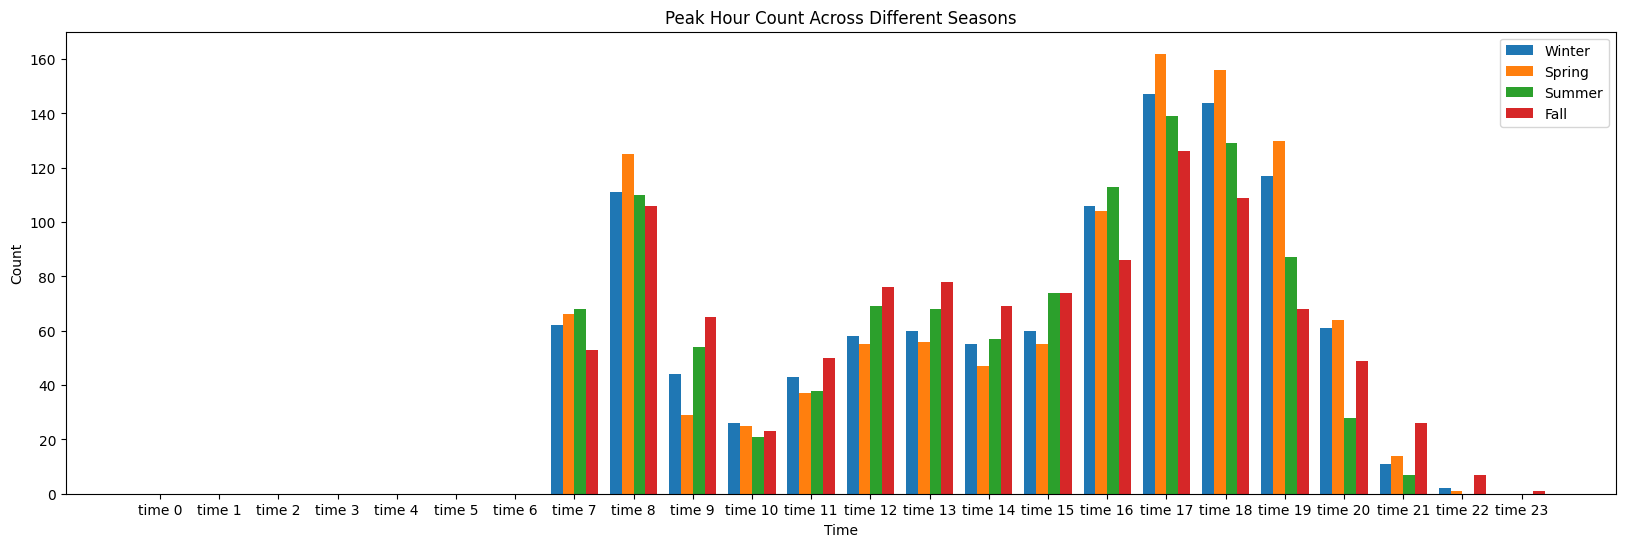

In [ ]:
season = [time_count_Spring, time_count_Summer, time_count_Fall, time_count_Winter]
season_name = ['Winter', 'Spring', 'Summer', 'Fall']
plt.figure(figsize=(20, 6))

# Bar width
bar_width = 0.2

# Set positions for each group of bars
n = len(season[0])  # Number of time slots
x = np.arange(n)    # Positions for the bars

# Plotting the bars for each season
for i in range(4):
    keys = list(season[i].keys())
    values = list(season[i].values())
    plt.bar(x + i * bar_width, values, width=bar_width, label=f'{season_name[i]}')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Peak Hour Count Across Different Seasons')

# Add ticks for x-axis
plt.xticks(x + bar_width * 1.5, keys)  # Centering the x-ticks

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Pertanyaan 2:

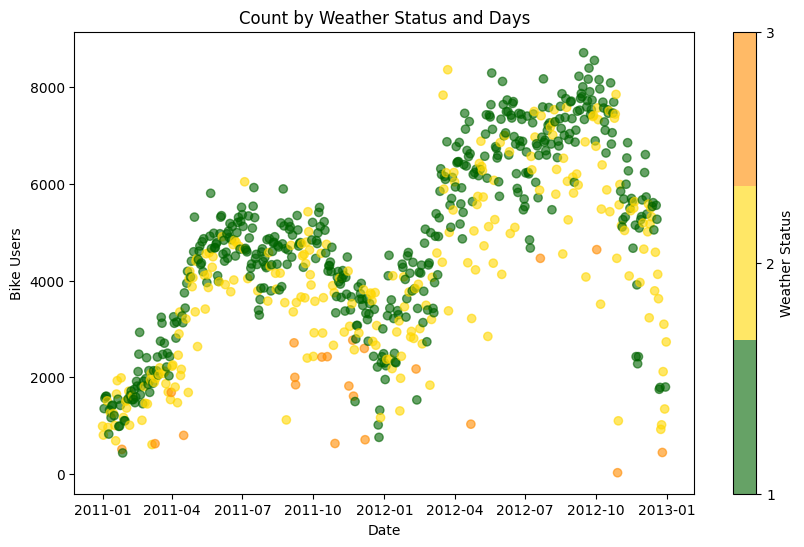

In [ ]:
from matplotlib.colors import ListedColormap

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Define the discrete colormap for the different weather conditions
colors = ['#006400', '#FFD700', '#FF8C00']  # Adjust colors to match the image (for 3 weather categories)
cmap = ListedColormap(colors)

# Scatter plot: X-axis as 'days', Y-axis as 'cnt', color determined by 'weathersit'
scatter = plt.scatter(dfDay['dteday'], dfDay['cnt'], c=dfDay['weathersit'], cmap=cmap, alpha=0.6)

# Add a colorbar for weather status and set the ticks to discrete values
cbar = plt.colorbar(scatter, ticks=[1, 2, 3])
cbar.set_label('Weather Status')
cbar.set_ticks([1, 2, 3])  # Adjust based on the number of weather conditions in your dataset

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Bike Users')
plt.title('Count by Weather Status and Days')

# Show the plot
plt.show()

**Insight**:

There are no orange dots representing a high count of bike users, and we can also observe that most of the blue dots are positioned above the yellow dots.

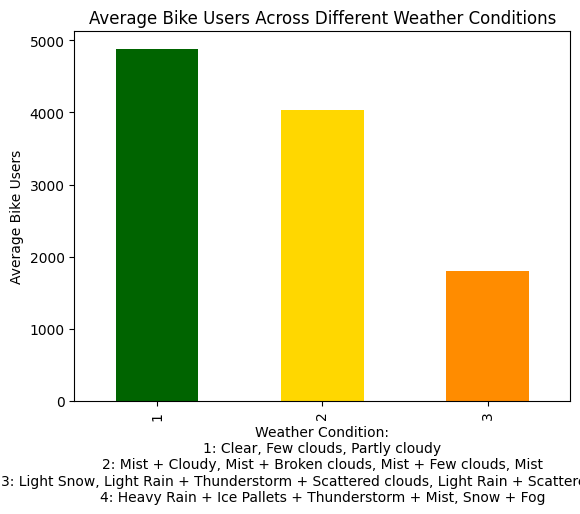

In [ ]:
# Group data by weather condition and calculate the average rentals
weather_groups = dfDay.groupby('weathersit')['cnt'].mean()

# Bar plot of average bike rentals per weather condition
colors = ['#006400', '#FFD700', '#FF8C00']
weather_groups.plot(kind='bar', color = colors)
plt.xlabel(
    'Weather Condition:\n'
    '1: Clear, Few clouds, Partly cloudy\n'
    '2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n'
    '3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n'
    '4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
)
plt.ylabel('Average Bike Users')
plt.title('Average Bike Users Across Different Weather Conditions')
plt.show()

**Insight**:

Note that we can see the difference of average bike users across different weather conditions, and this difference is statistically significant because using anova one way test, we get the p value of approximately $3.11 \times 10^{-17}$

## Analisis Lanjutan (Opsional)

We will use binning method

In [ ]:
dfDay['cnt'].describe()

,cnt
count,731.000000
mean,4504.348837
std,1937.211452
min,22.000000
25%,3152.000000
50%,4548.000000
75%,5956.000000
max,8714.000000


In [ ]:
dfDay['category'] = pd.cut(dfDay['cnt'],
                           bins=[dfDay['cnt'].min() - 1,
                                 dfDay['cnt'].quantile(0.25),
                                 dfDay['cnt'].quantile(0.5),
                                 dfDay['cnt'].quantile(0.75),
                                 dfDay['cnt'].max() + 1],
                           labels=['Very Not Busy', 'Not Busy', 'Busy', 'Very Busy'])

dfDay

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,category
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Very Not Busy
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Very Not Busy
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Very Not Busy
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Very Not Busy
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Very Not Busy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,Very Not Busy
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,Very Not Busy
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,Very Not Busy
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,Very Not Busy


In [ ]:
# set index to date
dfDay_transform = dfDay.set_index('dteday')

# preview data
dfDay_transform.head(5)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,category
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Very Not Busy
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Very Not Busy
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Very Not Busy
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Very Not Busy
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Very Not Busy


In [ ]:
# test if DatetimeIndex
isinstance(dfDay_transform.index, pd.DatetimeIndex)

True

In [ ]:
# Create a numerical mapping for categories
category_mapping = {'Very Not Busy': 0, 'Not Busy': 1, 'Busy': 2, 'Very Busy': 3}
dfDay_transform['category_num'] = dfDay_transform['category'].map(category_mapping)

In [ ]:
# Count occurrences of each category by day
category_counts = dfDay_transform.groupby(['dteday', 'category']).size().unstack(fill_value=0)

# Prepare the data for each category
very_not_busy = category_counts['Very Not Busy']
not_busy = category_counts['Not Busy']
busy = category_counts['Busy']
very_busy = category_counts['Very Busy']

<ipython-input-181-4583b5145b9e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_counts = dfDay_transform.groupby(['dteday', 'category']).size().unstack(fill_value=0)


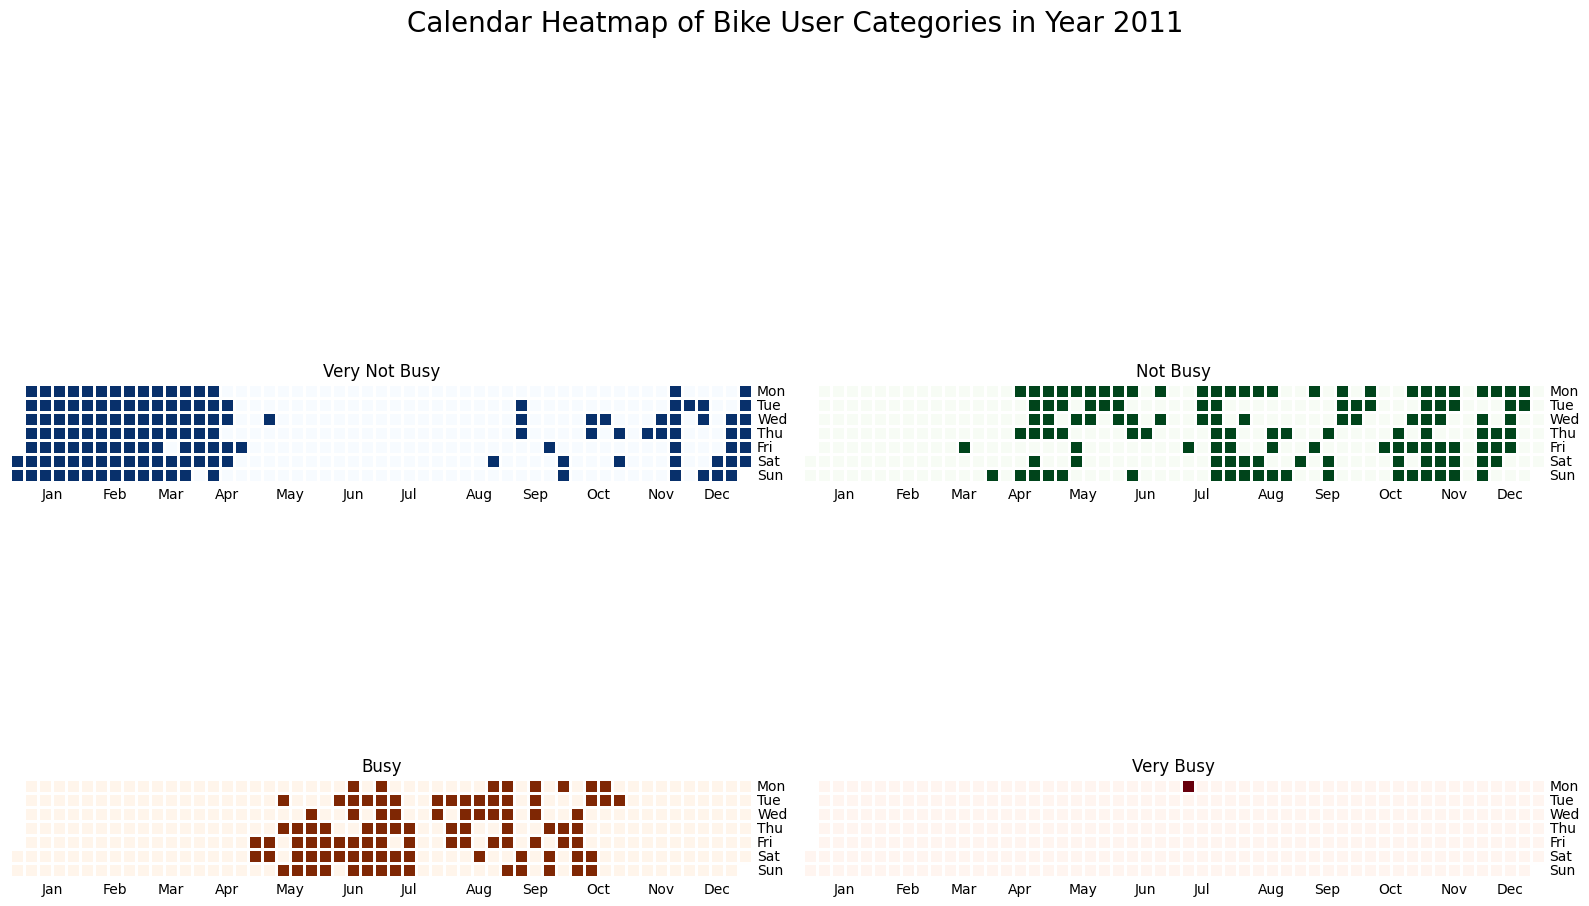

In [ ]:
# Calendar heatmap for each category
plt.figure(figsize=(16, 12))

# Plot for 'Very Not Busy'
plt.subplot(2, 2, 1)
calmap.yearplot(very_not_busy, year=2011, cmap='Blues')
plt.title('Very Not Busy')

# Plot for 'Not Busy'
plt.subplot(2, 2, 2)
calmap.yearplot(not_busy, year=2011, cmap='Greens')
plt.title('Not Busy')

# Plot for 'Busy'
plt.subplot(2, 2, 3)
calmap.yearplot(busy, year=2011, cmap='Oranges')
plt.title('Busy')

# Plot for 'Very Busy'
plt.subplot(2, 2, 4)
calmap.yearplot(very_busy, year=2011, cmap='Reds')
plt.title('Very Busy')

plt.suptitle('Calendar Heatmap of Bike User Categories in Year 2011', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

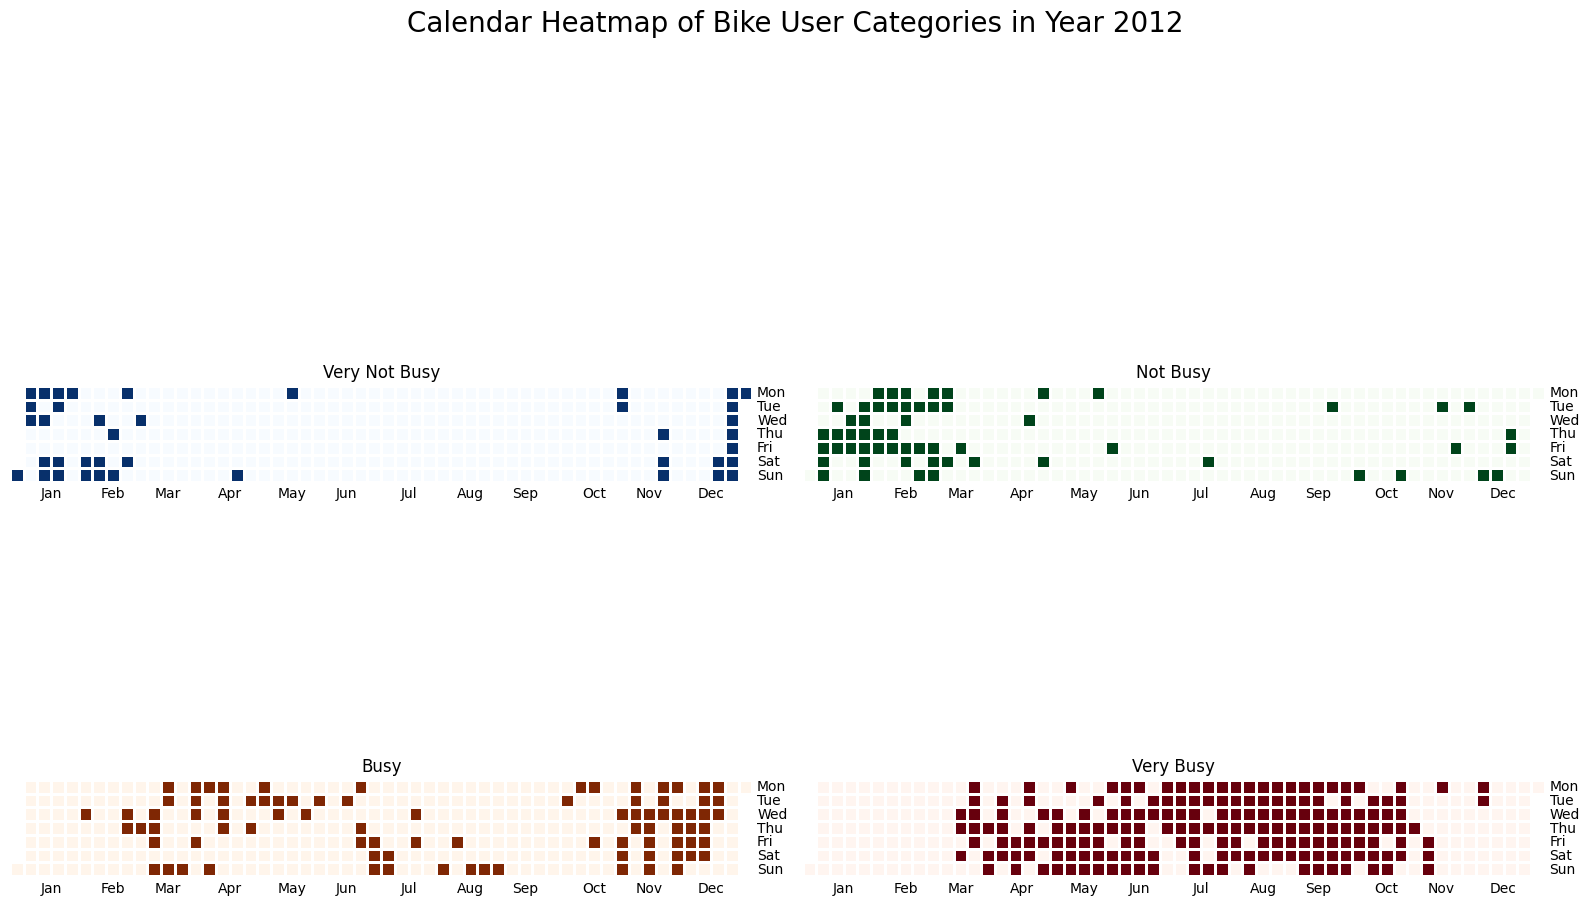

In [ ]:
# Calendar heatmap for each category
plt.figure(figsize=(16, 12))

# Plot for 'Very Not Busy'
plt.subplot(2, 2, 1)
calmap.yearplot(very_not_busy, year=2012, cmap='Blues')
plt.title('Very Not Busy')

# Plot for 'Not Busy'
plt.subplot(2, 2, 2)
calmap.yearplot(not_busy, year=2012, cmap='Greens')
plt.title('Not Busy')

# Plot for 'Busy'
plt.subplot(2, 2, 3)
calmap.yearplot(busy, year=2012, cmap='Oranges')
plt.title('Busy')

# Plot for 'Very Busy'
plt.subplot(2, 2, 4)
calmap.yearplot(very_busy, year=2012, cmap='Reds')
plt.title('Very Busy')

plt.suptitle('Calendar Heatmap of Bike User Categories in Year 2012', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Conclusion



---


*  Which times of day experience the highest bike rental demand across different seasons?

**Answer: time 17 and 18 are consistently being the peak hour for bike users across the seasons**

*   How does weather condition (e.g., clear vs. rainy days) influence the number of bike rentals?

**Answer:**

**1. There is a low negative correlation of -0.3225 between the weather status and the number of bike users across the seasons. However, this correlation is statistically significant, with a p-value of approximately $3.11 \times 10^{-17}$.**

**2. if we just consider spring season, the correlation is quite moderate, which is in ≈ -0.49**



---


Based on our insights, we recommend that the bike-sharing company take the following actions:

1. Provide more bikes during times 17 and 18.
2. Increase bike availability in the spring season (May to September), as the calendar heatmap indicates high demand during that period.